# M1. ROBOT DE LIMPIAZA REACTIVO

En esta actividad se mostrará una simulación cuyos agentes son robots de limpieza reactivos.

## ¿Qué recibe?
- Habitación de MxM espacios.
- Número de agentes. 
- Porcentaje de celdas inicialmente sucias.
- Tiempo máximo de ejecución.

## ¿Cómo funciona el modelo?
La simulación del robot de limpieza reactivo se lleva a cabo en una cuadrícula con celdas cuadradas, y cada una cuenta con dos estados, **limpia** o **sucia**. Cada celda tiene ocho vecinos, que son las celdas adyacentes horizontales, verticales y diagonales. 

Esta simulación inicializa las celdas sucias con ubicaciones aleatorias, recibiendo el porcentaje inicial de celdas sucias.
Y todos los n Robots (agentes) empiezan la simulación en la celda [1, 1].

En cada paso de tiempo, los agentes pueden realizar las siguientes acciones.
1. Si la celda está sucia, entonces aspira la celda.
2. Si la celda está limpia, el agente elige una **dirección aleatoria** de las celdas vecinas para moverse y elige la acción de movimiento. 
3. Si no puede moverse allí, permanecerá en la misma celda.
4. Se ejecuta el tiempo máximo establecido.



## Simulación
La simulación inicia con todos los agentes en la esquina superior izquierda de la cuadrícula.

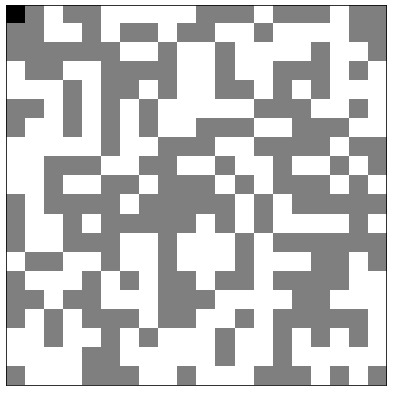

- Las celdas de color **negro** indican que existe al menos un agente en esa posición.
- Las celdas de color **gris** indican que ese espacio esta sucio.
- Las celdas de color **blanco** indican que el espacio esta limpio.


## Información Recopilada
A partir de las simulaciones se recolecta la siguiente información durante la ejecución:
- Tiempo necesario hasta que todas las celdas estén limpias (o se haya llegado al tiempo máximo).
- Porcentaje de celdas limpias después del termino de la simulación.
- Número de movimientos realizados por todos los agentes.

## Conclución

Una observación despues de correr la simulación varias veces es que la mayoría de las veces son las celdas más cercanas a la esquina inferior izquierda las últimas en limpiarse. 
Esto no es siempre, debido a que el siguiente movimiento de cada agente se realiza al azar a alguno de los vecinos. Sin embargo, al empezar todos los agentes en la celda (0, 0) comienzan moviendose aleatoriamente dentro del cuadrante superior derecho y estás celdas son las primeras en limpiarse. 

#### IMPACTO DEL NÚMERO DE CELDAS
El número de celdas de la simulación está dada por el ancho y el alto (M) de la cuadrícula. Entre más celdas haya, tomará más tiempo limpiarlas debido será más difícil para los agentes llegar a todas las celdas (especialmente a las más lejanas al punto inicial por lo mencionado anteriormente).
Si recibe como parámetro una M muy pequeña, será más fácil llegar a todas las celdas, entre más aumente la M más difícil será.

#### IMPACTO DE NÚMERO DE AGENTES
El número de agentes que existen en la simulación impactan en el tiempo para limpiar todas las celdas; entre más agentes existan, serán capaces de limpiar todo el espacio en menor tiempo, pues en cada paso del modelo cada agente buscará una celda nueva para limpiar. Entre menos agentes existen más tardan, e incluso si el número de agentes es muy pequeño y el tiempo no lo suficientemente grande, no lograrán limpiar todas las celdas.
El número de agentes impacta también en el número de movimientos realizados, si hay una diferencia muy significativa entre agentes, las simulaciones con más agentes tendrán menos movimientos totales. Sin embargo, no se puede generalizar pues al elegir una casilla al azar entre los vecinos, es posible que aún teniendo muchos agentes, el número de movimientos no disminuya de manera considerable.

#### IMPACTO DEL TIEMPO
La cantidad de tiempo, o veces en las que se realizará la simulación impacta en si los agentes terminarán de limpiar o no; si el tiempo es demasiado pequeño, muchas veces no se limpiará el 100% de las celdas, y entre más se reduzca menor será el porcentaje de celdas limpias.

#### IMPACTO DEL PORCENTAJE INICIAL
El porcentaje de celdas sucias al iniciar la simulación también afecta al tiempo en el que se limpia toda la cuadrícula; si las celdas sucias son el 100% será más difícil limpiar todas. Entre más chico sea el porcentaje, será más fácil de terminar de limpiar; aunque no se puede asegurar pues depende también de los movimientos aleatorios de los agentes para encontrar las celdas sucias.

#### ANÁLISIS

Para finalizar, el resultado de la simulación depende de todos los datos de entrada:
- Número de celdas.
- Número de agentes. 
- Porcentaje de celdas inicialmente sucias.
- Tiempo máximo.

Sin embargo, al depender mucho del azar en cuanto a los movimientos de los agentes, no se puede asegurar que cierto número de entrada arroje un resultado mejor, solo se puede predecir. Una excelente mejoría a los agentes sería que no puedan visitar una celda si ya fue visitada antes, de esta manera solo podrán visitar celdas nuevas y el tiempo en el que se limpie por completo el lugar sería más eficiente.


## Imports

Antes de empezar a crear el modelo del juego de la vida con multiagentes es necesario tener instalado los siguientes paquetes:
- `python`: asegúrense de usar la versión 3+.
- `mesa`: el framework de Python para el modelado de agentes.
- `numpy`: es una biblioteca de Python para el manejo de matrices, arreglos, manipulación matemática, lógica y mucho más.
- `matplotlib`: es una biblioteca para crear visualizaciones estáticas, animadas e interactivas en Python.

Para poder modelar la simulación usando el framework de `mesa` es necesario importar dos clases: una para el modelo general, y otro para los agentes.

In [348]:
# Importamos las clases que se requieren para manejar los agentes (Agent) y su entorno (Model)
from mesa import Agent, Model

# Debido a que necesitamos que todos los agentes empiecen en la misma celda
from mesa.space import MultiGrid

# Con 'SimultaneousActivation', hacemos que todos los agentes se activen al azar
from mesa.time import RandomActivation

# Haremos uso de 'DataCollector' para obtener información de cada paso de la simulación
from mesa.datacollection import DataCollector

# Matplotlib lo usaremos para crear una animación de cada uno de los pasos del modelo
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "jshtml"
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Importamos paquetes para el manejo de datos numéricos
import numpy as np
import pandas as pd

# Definimos otros paquetes que vamos a usar para medir el tiempo de ejecución del algoritmo
import time
import datetime

In [470]:
# Función para obtener la matriz de espacios limpios o sucios
def get_grid(model):
    grid =  np.zeros((model.grid.width, model.grid.height))
    
    for x in range (len(model.clean_grid)):
        for y in range (len(model.clean_grid[x])):
            grid[x][y] = model.clean_grid[x][y]
    
    for (content, x, y) in model.grid.coord_iter():
        if len(content) > 0:
            grid[x][y] = 2
            
    return grid


# Agente de Robot 
class CleaningAgent(Agent):
    def __init__(self, unique_id, model, width, height):
        super().__init__(unique_id, model)
        self.width = width
        self.height = height
        self.moves = 0
        
        
    def step(self):
        # Obtiene el valor de la celda de la matriz de limpieza con respecto a su posición
        # 1 -> sucia     0 -> limpia
        
        temp = model.clean_grid[self.pos]
        
        # Si la celda esta sucia, aspira la celda y la limpia
        if temp == 1:
            model.clean_grid[self.pos] = 0
            
        # Si la celda esta limpia 
        else:
            
            # Lista con los posibles movimientos hacia los 8 vecinos
            neighbours = [[-1, -1], [-1, 0], [-1, 1], 
                          [0, -1], [0, 1],
                          [1, -1], [1, 0], [1, 1]]
            
            # Elige uno de los vecinos al azar
            move = np.random.randint(len(neighbours))
            
            # Si la posición está dentro de los límites se cambia de posición
            if (self.pos[0] + neighbours[move][0] >= 0 and self.pos[0] + neighbours[move][0] < self.width
                and self.pos[1] + neighbours[move][1] >= 0 and self.pos[1] + neighbours[move][1] < self.height):
                    # Se cambia la posición del agente al vecino elegido
                    self.model.grid.move_agent(self, (self.pos[0] + neighbours[move][0], self.pos[1] + neighbours[move][1]))
                    self.moves += 1
                
        
            
# Modelo de Limpieza
class CleaningModel(Model):
    def __init__(self, N, width, height, percentage=0.50):
        self.num_agents = N
        self.grid = MultiGrid(width, height, False)
        self.schedule = RandomActivation(self)
        
        self.clean_grid = np.zeros((width, height))
        
        total_dirty = width * height * percentage
        
        # Crear una matriz donde 0 es limpio y 1 sucio
        while(total_dirty > 0):
            x = np.random.randint(0, self.grid.height)
            y = np.random.randint(0, self.grid.width)
            
            if self.clean_grid[y][x] == 0:
                self.clean_grid[y][x] = 1
                total_dirty -= 1
                
                
        
        # Crear agente en la posición 0, 0
        for i in range (N):
            a = CleaningAgent(i, self, width, height)
            self.grid.place_agent(a, (0, 0))
            self.schedule.add(a)
    
        # Recolectar los datos
        self.datacollector = DataCollector(model_reporters = {"Grid" : get_grid})
    
    def step(self):
        self.datacollector.collect(self)
        self.schedule.step()
        

In [475]:
M = 20
N = 20
NUM_AGENTS = 20
PERCENTAGE = 0.50
MAX_TIME = 700

# Crear el modelo de limpieza
model = CleaningModel(NUM_AGENTS, M, N, PERCENTAGE)

# Inicializar el tiempo en 0
time = 0
# Variable que ayudará a saber si todas las celdas están limpias, empieza en False
end = False

# Hasta que se acabe el tiempo o se haya limpiado todo
while (time < MAX_TIME and not end):
    model.step()
    time += 1
    # Revisamos si todas las celdas están limpias, si es así cambiamos el valor de end
    if np.all(model.clean_grid == 0):
        end = True

text = "\n"
        
# Si acabo de limpiar, imprimimos el tiempo que le tomo
if end:
    print("¡Completamente Limpio!")
    print("Tiempo hasta Limpiar Todo: ", time)
    text += "¡Completamente Limpio! \nIteraciones hasta Limpiar Todo: " + str(time) + "\n"
    
# Si no acabo obtenemos el porcentaje final de celdas limpias al final de la simulación
else:
    percentage_clean = 0
    for x in model.clean_grid:
        for y in x:
            if y == 0:
                percentage_clean += 1

    percentage_clean /= (M * M)
    print("Porcentaje de Celdas Limpias: ", percentage_clean)
    text += "Porcentaje de Celdas Limpias: " + str(percentage_clean) + "\n"

    
# Obtener el número de movimientos totales realizados por todos los agentes
total_moves = 0
for (content, x, y) in model.grid.coord_iter():
    for k in content:
        # Suma los movimientos de cada agente
        total_moves += k.moves
print("Movimientos Totales: ", total_moves)
text += "Movimientos Totales: " + str(total_moves) + "\n"


¡Completamente Limpio!
Tiempo hasta Limpiar Todo:  383
Movimientos Totales:  6819


In [476]:
# Modelo con las variables como datafram
all_grid = model.datacollector.get_model_vars_dataframe()

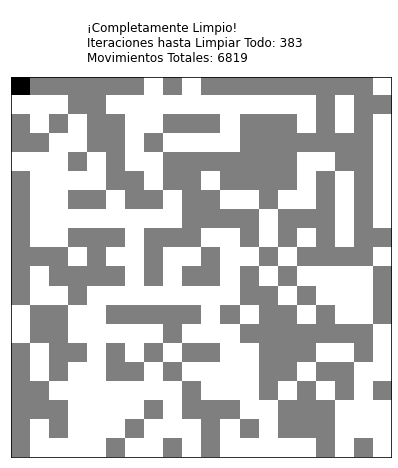

In [477]:
fig, axs = plt.subplots(figsize=(7, 7))
axs.set_xticks([])
axs.set_yticks([])
font = {'color':  'k',
        'size': 12,
        }
plt.text(3.5, -0.5, text, fontdict = font)
# Desplegar desde el pixel 0 0 la matriz. En binario
patch = plt.imshow(all_grid.iloc[0][0], cmap = plt.cm.binary)

def animate(i):
    patch.set_data(all_grid.iloc[i][0])
    
anim = animation.FuncAnimation(fig, animate, frames = time)

In [478]:
anim